# Data shift

In [7]:
subject=5
ppg_name="rppg" # rppg
sr=30 # 255 or 30
start=30 # 30000 (c->msec) or 30(r->sec)
length=18000 # 153000, 18000

path="D:\\prlab\\ysg\\rppg\\new\\data\\%s\\%s%d.csv"%(ppg_name,ppg_name,subject)
ppg = pd.read_csv(path,header=None)
ppg=ppg.transpose()
ppg.columns=['hr','time','group']
print(ppg)
print("before : ", len(ppg))

group=pd.to_numeric(ppg['group'])
group=group[group>=start].index[0]
cut_ppg=ppg[group:group+length]

#cut_ppg=ppg[(sr * 30) : sr * 630]

print(cut_ppg)
print("after: ",len(cut_ppg)) # 10분

t1=0
t2=sr*300
#print(t1,t2) # 5분 -> 300초 ->데이터 9000개
for i in range(len(cut_ppg)):
    new_ppg=cut_ppg[t1:t2].transpose()
    new_ppg.to_csv("D:\\prlab\\ysg\\rppg\\new\\data\\%s\\shift\\%d\\%s%d_%d.csv" %(ppg_name,subject,ppg_name,subject,i),header=False,index=False)
    t1=t1+(30*sr)
    t2=t2+(30*sr)
    print(t1,t2)
    if t2>len(cut_ppg):
        break
    print('data shifting : ',str(subject)+'_'+str(i))

             hr         time  group
0     -0.000219       0.0000    0.0
1     -0.001782      33.3333    0.0
2     -0.003681      66.6667    0.0
3     -0.006009     100.0000    0.0
4     -0.008492     133.3333    0.0
...         ...          ...    ...
19757 -0.000055  659866.6667  659.0
19758 -0.000218  659900.0000  659.0
19759 -0.000215  659933.3333  659.0
19760 -0.000057  659966.6667  659.0
19761  0.000196  660000.0000  660.0

[19762 rows x 3 columns]
before :  19762
             hr         time  group
861    0.001519   30000.0000   30.0
862    0.001212   30033.3333   30.0
863    0.000681   30066.6667   30.0
864   -0.000025   30100.0000   30.0
865   -0.000776   30133.3333   30.0
...         ...          ...    ...
18856 -0.000499  629833.3333  629.0
18857 -0.000900  629866.6667  629.0
18858 -0.001497  629900.0000  629.0
18859 -0.002182  629933.3333  629.0
18860 -0.002760  629966.6667  629.0

[18000 rows x 3 columns]
after:  18000
900 9900
data shifting :  5_0
1800 10800
data shifting

# hrv graph 시각화

In [1]:
import os
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
import csv
import math
from hrvanalysis import get_frequency_domain_features
from utils import *
import pandas as pd
import sys

## csv파일 불러오기


In [18]:
# 그래프 확인하기
subject=4
num=3

cppg_frequency_features=[]
rppg_frequency_features=[]

path_rppg="D:\\prlab\\ysg\\rppg\\new\\data\\rppg\\shift\\%d\\rppg%d_%d.csv"%(subject,subject,num)#"D:\\prlab\\ysg\\rppg\\new\\data\\rppg\\rppg%d.csv"%(subject)
rppg = pd.read_csv(path_rppg,header=None)
rppg=rppg.transpose()
rppg.columns=['hr','time','group']
#rppg=rppg[(30 * 30) : (30 * 630)]

rppg_time=np.array(rppg['time'],dtype='float32')
rppg_hr=np.array(rppg['hr'],dtype='float32')


print(rppg_hr.shape)
print(rppg)

path_cppg="D:\\prlab\\ysg\\rppg\\new\\data\\cppg\\shift\\%d\\cppg%d_%d.csv"%(subject,subject,num)#"D:\\prlab\\ysg\\rppg\\new\\data\\cppg\\cppg%d.csv"%(subject)
cppg = pd.read_csv(path_cppg,header=None)
cppg=cppg.transpose()
cppg.columns=['hr','realtime','time']
#cppg=cppg[(255 * 30): (255 * 630)]

cppg_time=np.array(cppg['time'],dtype='float32')
cppg_hr=np.array(cppg['hr'],dtype='float32')


c_sr=255
r_sr=30

c_distance=12
r_distance=10

(9000,)
            hr         time  group
0     0.000583  120000.0000  120.0
1    -0.000050  120033.3333  120.0
2    -0.000643  120066.6667  120.0
3    -0.001212  120100.0000  120.0
4    -0.001789  120133.3333  120.0
...        ...          ...    ...
8995  0.000708  419833.3333  419.0
8996  0.000424  419866.6667  419.0
8997 -0.000029  419900.0000  419.0
8998 -0.000540  419933.3333  419.0
8999 -0.001003  419966.6667  419.0

[9000 rows x 3 columns]


In [128]:
print(len(cppg_hr),len(rppg_hr)) # shift후 > 5분데이터 (76500,9000)
print(cppg_hr)
print(cppg_time)

76500 9000
[2175. 2175. 2175. ... 2001. 2002. 2003.]
[329872.   329876.1  329879.66 ... 629733.06 629736.7  629741.06]


-----------------filtering---------------
-------------------------------------------------
76500
76500


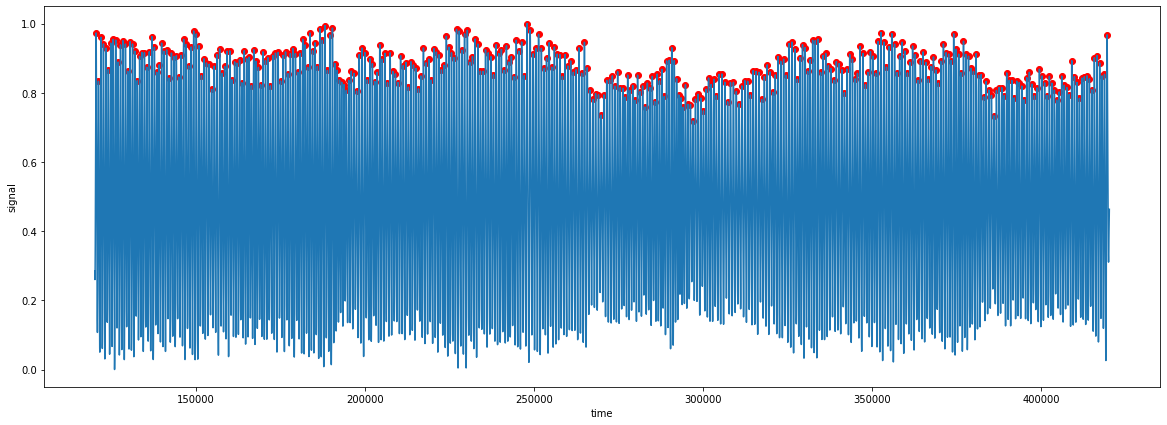

In [19]:
# 앞뒤 30초 cutting
c_distance=150

filter_c=preprocessing(cppg_hr,2.0,0.5,c_sr)
print(len(filter_c))
scale_c=normalization(filter_c)
print(len(scale_c))
c_peaks_y,c_peaks_x=detect_peak(cppg_time,scale_c,c_distance)

plt.figure(figsize=(20, 7))    
plt.scatter(c_peaks_x, c_peaks_y,color='red')
plt.plot(cppg_time, scale_c, label="find feak in time domain")
#plt.xlim([550000,750000]) # 30초 즉, 30000msec 씩 shift
plt.xlabel('time')
plt.ylabel('signal')
plt.show()


-----------------filtering---------------
-------------------------------------------------


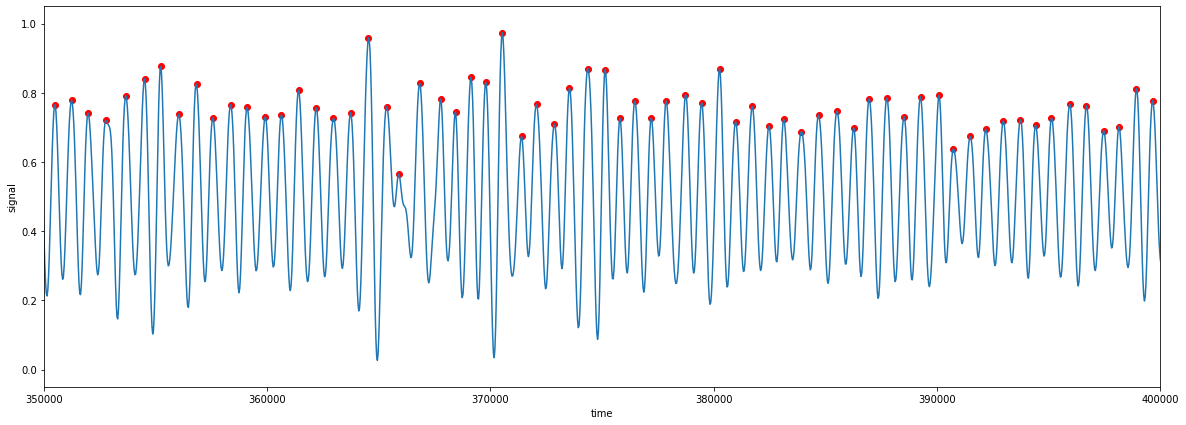

In [23]:
# 앞,뒤 30초씩 cutting
r_distance=15

filter_r=preprocessing(rppg_hr,2.0,0.5,r_sr)

scale_r=normalization(filter_r)

r_peaks_y,r_peaks_x=detect_peak(rppg_time,scale_r,r_distance)
#print(r_peaks_x)

plt.figure(figsize=(20, 7))    
plt.scatter(r_peaks_x, r_peaks_y,color='red')
plt.plot(rppg_time,scale_r, label="find feak in time domain")
plt.xlim([350000, 400000])# msec
plt.xlabel('time')
plt.ylabel('signal')
plt.show()



# ppi

ppi shape:  395 395


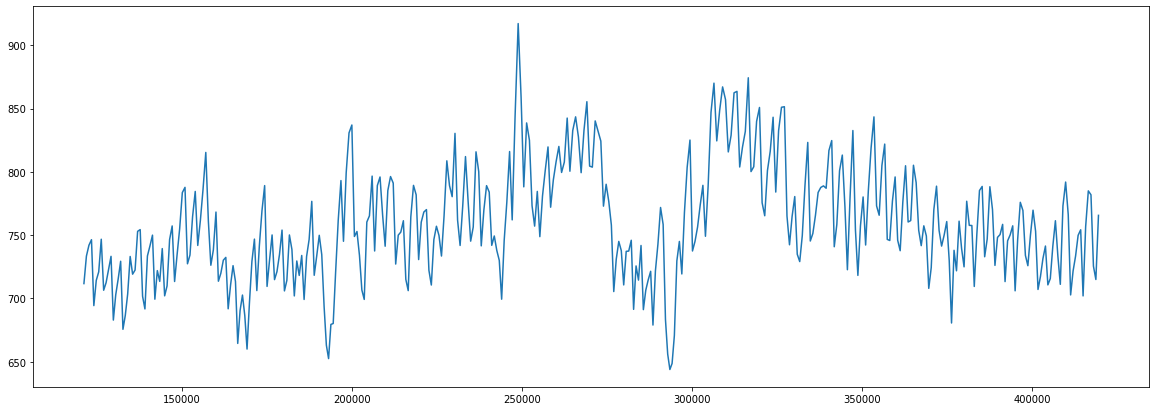

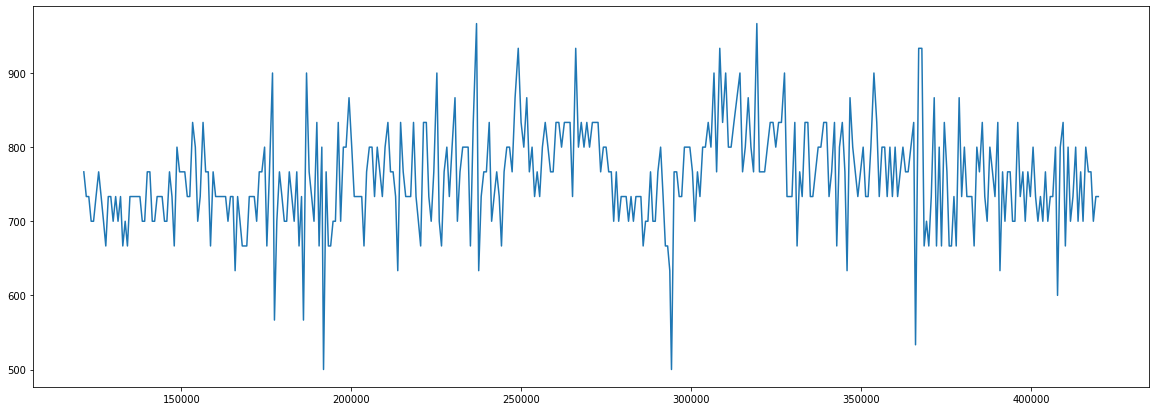

In [24]:
from scipy.stats import zscore
cppg_ppi=np.diff(c_peaks_x)
rppg_ppi=np.diff(r_peaks_x)

print("ppi shape: ",len(cppg_ppi),len(rppg_ppi))

plt.figure(figsize=(20, 7))    
plt.plot(c_peaks_x[1:],cppg_ppi)
#plt.xlim(0,200)
plt.show()
#print(cppg_ppi)

plt.figure(figsize=(20, 7))    
plt.plot(r_peaks_x[1:],rppg_ppi)
#plt.xlim(0,200)
plt.show()
#print(rppg_ppi)

# # outlier 조정
# plt.figure(figsize=(40, 15))
# rr_corrected = rppg_ppi_.copy()
# rr_corrected[np.abs(zscore(rppg_ppi_)) > 2] = np.median(rppg_ppi_)

# rppg_ppi=rr_corrected

# plt.title("RR-intervals", fontsize=24)
# plt.xlabel("Time (ms)", fontsize=16)
# plt.ylabel("RR-interval (ms)", fontsize=16)

# plt.plot(rppg_ppi_, color="red", linewidth=1, label="RR-intervals")
# plt.plot(rr_corrected, color="green", linewidth=2, label="RR-intervals after correction")
# plt.xlim(0,100)
# plt.legend(fontsize=20)

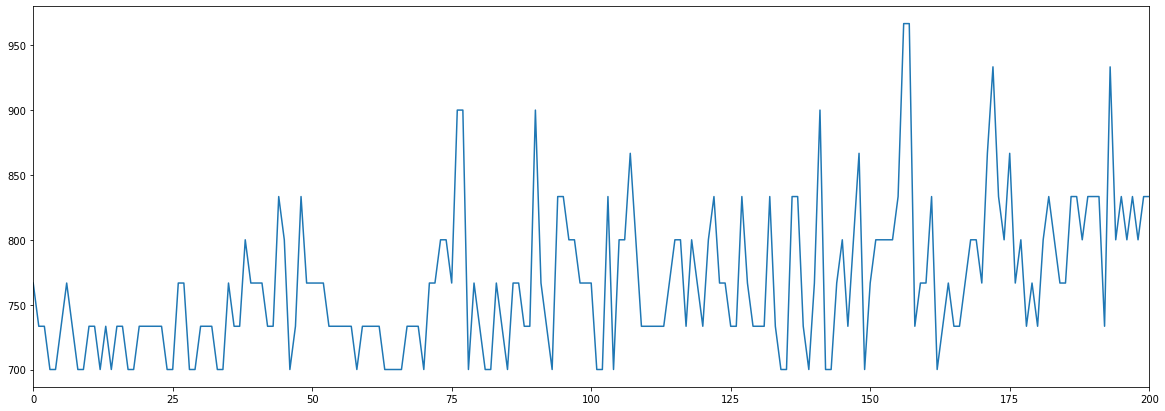

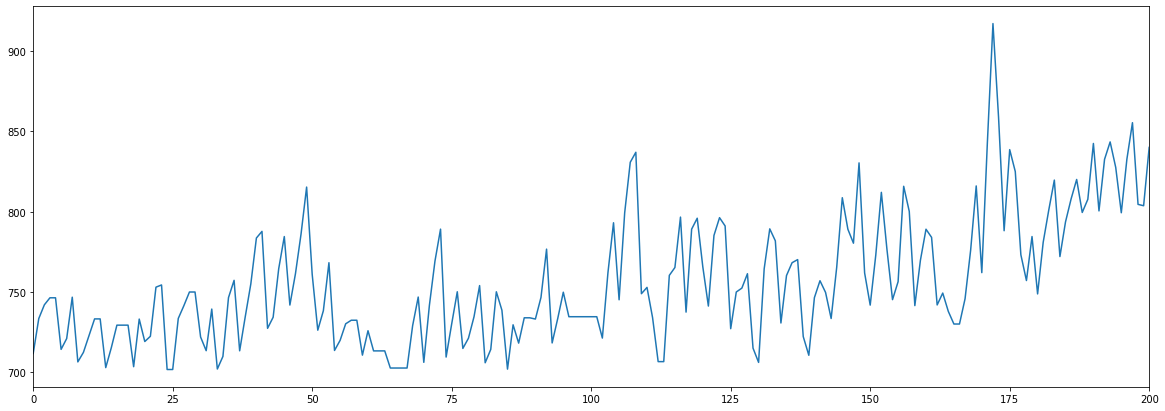

In [25]:
# outlier remove
rppg_ppi_=rppg_ppi
for i in range(len(rppg_ppi)):
    if rppg_ppi[i]>1200 or rppg_ppi[i]<700:
        rppg_ppi_[i]=rppg_ppi[i-1]
    else:
        rppg_ppi_[i]=rppg_ppi[i]
rppg_ppi=rppg_ppi_
plt.figure(figsize=(20, 7))    
plt.plot(rppg_ppi)
plt.xlim(0,200)
plt.show()

cppg_ppi_=cppg_ppi
for i in range(len(cppg_ppi)):
    if cppg_ppi[i]>1200 or cppg_ppi[i]<700:
        cppg_ppi_[i]=cppg_ppi[i-1]
    else:
        cppg_ppi_[i]=cppg_ppi[i]
cppg_ppi=cppg_ppi_
plt.figure(figsize=(20, 7))    
plt.plot(cppg_ppi)
plt.xlim(0,200)
plt.show()

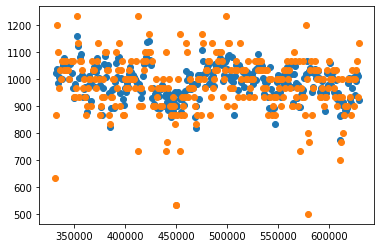

In [17]:
plt.scatter(c_peaks_x[1:],cppg_ppi)
plt.scatter(r_peaks_x[1:],rppg_ppi)
#plt.xlim([330000,360000])
plt.show()

# hrv features

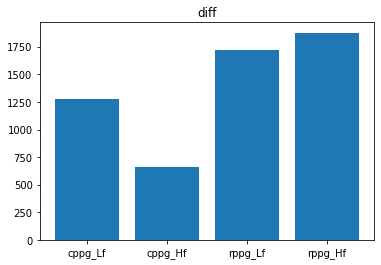

c의 lf는 r보다 (c_lf / r_lf =)  0.7447799819438276 배 크다
c의 hf는 r보다 (c_hf / r_hf =)  0.35154700401811956 배 크다
r의 lf는 c보다 (r_lf / c_lf =)  1.3426784073734968 배 크다
r의 hf는 c보다 (r_hf / c_hf =)  2.8445698258559404 배 크다
r의 lf는 c보다 (r_lf - c_lf =) 438.7056102730926 만큼 크다
r의 hf는 c보다 (r_hf - c_hf =) 1216.5412892011411 만큼 크다
배율:  0.47201457147197307
r의 hf는 lf와 비교했을때 ((r_hf - c_hf) / (r_lf - c_lf) = ) 2.7730242347341965 배 차이가 크다
c의 hf는 lf와 비교했을때 ((c_hf - r_hf) / (c_lf - r_lf) = ) 2.7730242347341965 배 차이가 크다
lf_hf_ratio:  1.9411303284140304 0.9162418001375988


,LF,HF,diff
cppg,1280.225427,659.525745,-620.7
rppg,1718.931037,1876.067035,157.136
c-r diff,-438.705610,-1216.541289,-


In [134]:
import pandas as pd
from pandas import DataFrame

cppg_frequency_feature = get_frequency_domain_features(cppg_ppi)
rppg_frequency_feature = get_frequency_domain_features(rppg_ppi)


plt.bar(['cppg_Lf','cppg_Hf','rppg_Lf','rppg_Hf'],[cppg_frequency_feature['lf'],cppg_frequency_feature['hf'],rppg_frequency_feature['lf'],rppg_frequency_feature['hf']])
plt.title('diff')
plt.show()

data={'LF':[cppg_frequency_feature['lf'],rppg_frequency_feature['lf'],cppg_frequency_feature['lf']-rppg_frequency_feature['lf']],
        'HF':[cppg_frequency_feature['hf'],rppg_frequency_feature['hf'],cppg_frequency_feature['hf']-rppg_frequency_feature['hf']],
     'diff':[cppg_frequency_feature['hf']-cppg_frequency_feature['lf'],rppg_frequency_feature['hf']-rppg_frequency_feature['lf'],"-"]}
frame=DataFrame(data,index=['cppg','rppg','c-r diff'])

print("================================================================================================")

print("c의 lf는 r보다 (c_lf / r_lf =) ",cppg_frequency_feature['lf']/ rppg_frequency_feature['lf'],"배 크다")
print("c의 hf는 r보다 (c_hf / r_hf =) ",cppg_frequency_feature['hf']/rppg_frequency_feature['hf'],"배 크다")


print("================================================================================================")
print("r의 lf는 c보다 (r_lf / c_lf =) ",rppg_frequency_feature['lf']/ cppg_frequency_feature['lf'],"배 크다")
print("r의 hf는 c보다 (r_hf / c_hf =) ",rppg_frequency_feature['hf']/ cppg_frequency_feature['hf'],"배 크다")
print("r의 lf는 c보다 (r_lf - c_lf =)",rppg_frequency_feature['lf'] - cppg_frequency_feature['lf'],"만큼 크다")
print("r의 hf는 c보다 (r_hf - c_hf =)",rppg_frequency_feature['hf'] - cppg_frequency_feature['hf'],"만큼 크다")
print("배율: ", (rppg_frequency_feature['lf']/ cppg_frequency_feature['lf'])/(rppg_frequency_feature['hf']/ cppg_frequency_feature['hf']) )
print("================================================================================================")
print("r의 hf는 lf와 비교했을때 ((r_hf - c_hf) / (r_lf - c_lf) = )", abs(rppg_frequency_feature['hf']-cppg_frequency_feature['hf'])/abs(rppg_frequency_feature['lf']- cppg_frequency_feature['lf']),"배 차이가 크다")
print("c의 hf는 lf와 비교했을때 ((c_hf - r_hf) / (c_lf - r_lf) = )", abs(cppg_frequency_feature['hf']-rppg_frequency_feature['hf'])/abs(cppg_frequency_feature['lf']- rppg_frequency_feature['lf']),"배 차이가 크다")

print("================================================================================================")
print("lf_hf_ratio: ",cppg_frequency_feature['lf_hf_ratio'],rppg_frequency_feature['lf_hf_ratio'] )
frame

In [348]:
print(cppg_frequency_feature )
print(rppg_frequency_feature)

{'lf': 227.6909177512353, 'hf': 478.1535473610732, 'lf_hf_ratio': 0.4761878668638144, 'lfnu': 32.257944774704285, 'hfnu': 67.74205522529572, 'total_power': 875.085951015152, 'vlf': 169.2414859028434}
{'lf': 330.51553904454164, 'hf': 962.6794659648692, 'lf_hf_ratio': 0.3433287513962649, 'lfnu': 25.558058743208374, 'hfnu': 74.44194125679164, 'total_power': 1463.8919040495068, 'vlf': 170.69689904009593}


# 결과 csv로 저장

In [349]:
cppg_frequency_feature['num'] = "cppg"+str(subject) + "_" + str(num)
rppg_frequency_feature['num'] = "rppg"+str(subject) + "_" + str(num)

In [350]:
save_path="D:\\prlab\\ysg\\rppg\\new\\result\\%d.csv"%subject
with open(save_path, 'a', newline='') as f:
    wr = csv.writer(f)
    if num==0:
        # 처음만 csv에 key 저장
        wr.writerow(cppg_frequency_feature.keys())
    wr.writerow(cppg_frequency_feature.values())
    wr.writerow(rppg_frequency_feature.values())
    f.close()